<a href="https://colab.research.google.com/github/1giacomo/xtream-ai-assignment/blob/main/Xtream_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Giacomo Rossi

Repository: [1giacomo/xtream-ai-assignment](https://github.com/1giacomo/xtream-ai-assignment)

LinkedIn: [giacomo-rossi-100](https://www.linkedin.com/in/giacomo-rossi-100/)

[Go to Challenge 1](https://colab.research.google.com/drive/1wkIHYESKVFetaFaZ9ZWnE3EZC6939grY)

# Challenge 2: Model that predicts a gem's worth based on its characteristics

Plot twist! The expert who priced these gems has now vanished. Francesco needs you to be the new diamond evaluator. He's looking for a model that predicts a gem's worth based on its characteristics. And, because Francesco's clientele is as demanding as he is, he wants the why behind every price tag.

Create another Jupyter notebook where you develop and evaluate your model.



## Let's pick up where we left off

I take the first part of the code from the previus Notebook:

* Load the data
* Clean the data
* Encode the variables

In [103]:
import pandas as pd

In [104]:
# UNCOMMENT THIS BLOCK IF YOU RUN LOCAL

# Load the dataset from the .csv file
# diamonds = pd.read_csv("./datasets/diamonds/diamonds.csv")

In [105]:
# REMOVE THIS BLOCK IF YOU RUN LOCAL

# Clone the dataset from Github
!git clone https://github.com/1giacomo/xtream-ai-assignment.git

# Load the dataset from the .csv file
diamonds = pd.read_csv("./xtream-ai-assignment/datasets/diamonds/diamonds.csv")

fatal: destination path 'xtream-ai-assignment' already exists and is not an empty directory.


In [106]:
# Data cleaning
cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['z'] > 0]

# Encode the categorical variables
cut_mapping_dict = {
    "Ideal": 4,
    "Premium": 3,
    "Very Good": 2,
    "Good": 1,
    "Fair": 0,
}

clarity_mapping_dict = {
    "IF": 7,
    "VVS1": 6,
    "VVS2": 5,
    "VS1": 4,
    "VS2": 3,
    "SI1": 2,
    "SI2": 1,
    "I1": 0
}

cleaned_diamonds['cut'] = cleaned_diamonds['cut'].replace(cut_mapping_dict)
cleaned_diamonds['color'] = cleaned_diamonds['color'].apply(lambda x: ord('Z') - ord(x))
cleaned_diamonds['clarity'] = cleaned_diamonds['clarity'].replace(clarity_mapping_dict)

<ipython-input-106-d73d5daf5e13>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['z'] > 0]


## And don't forget the correlation

In the previous analysis, we found that carat has a very strong correlation with x, y and z.

So we can abandon these columns because they don't provide new information.

In [107]:
cleaned_diamonds = cleaned_diamonds.drop(['x', 'y', 'z'], axis=1)

# Here is the cleaned dataset
cleaned_diamonds.describe()

,carat,cut,color,clarity,depth,table,price
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,0.794117,2.900581,19.392463,3.059130,61.710844,57.446242,3930.581880
std,0.467981,1.122123,1.691265,1.631902,1.445563,2.259752,3970.923311
min,0.230000,0.000000,16.000000,0.000000,44.000000,51.600000,351.000000
25%,0.400000,2.000000,18.000000,2.000000,61.000000,56.000000,942.000000
50%,0.700000,3.000000,19.000000,3.000000,61.800000,57.000000,2398.000000
75%,1.040000,4.000000,21.000000,4.000000,62.500000,59.000000,5376.000000
max,4.130000,4.000000,22.000000,7.000000,70.200000,95.000000,18787.000000


# Here is my idea


### What needs my model?

Reading the assignment, my idea was to think of a model with the following characteristics:

* Simple
* "Readable"

I mean a model that can be represented and with readable considerations.

### Which model have these characteristics?

A model that can do this job pretty well is the [Regression Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

It has a really simple implementation and can be printed.

So let build our model.

### Split the dataset

I want to fit the data in a model, so I split my data in:

* 75% Traning data (```X_train```, ```y_train```)
* 25% Test data (```X_test```, ```y_test```) to evaluate the model

In [108]:
from sklearn.model_selection import train_test_split
X = cleaned_diamonds.drop(['price'], axis=1).copy()
y = cleaned_diamonds[['price']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
# X_train, X_test, y_train, y_test

## Fit the model

I put the limit ```max_leaf_nodes=10``` to avoid over fitting.

Otherwise, the model would create a tree that would branch out for each case.

In [109]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_leaf_nodes=10)

clf = clf.fit(X_train, y_train)

In [110]:
clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Predictions

The prediction score is pretty high (>90%).

We can say this model works.

In [111]:
predictions = clf.predict(X_test)
predictions_prob = clf.score(X_test, y_test)
predictions_prob

0.9028675012560712

### Feature importance

Interesting about this model is that we can extrapolate the most important features.



<Axes: >

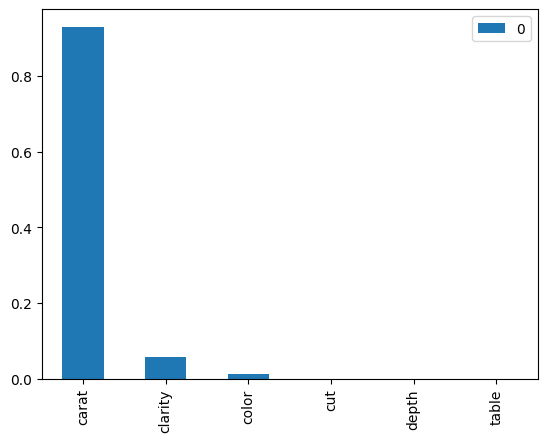

In [112]:
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0, ascending=False)
feature_importance.head(10).plot(kind='bar')

## Tree plot

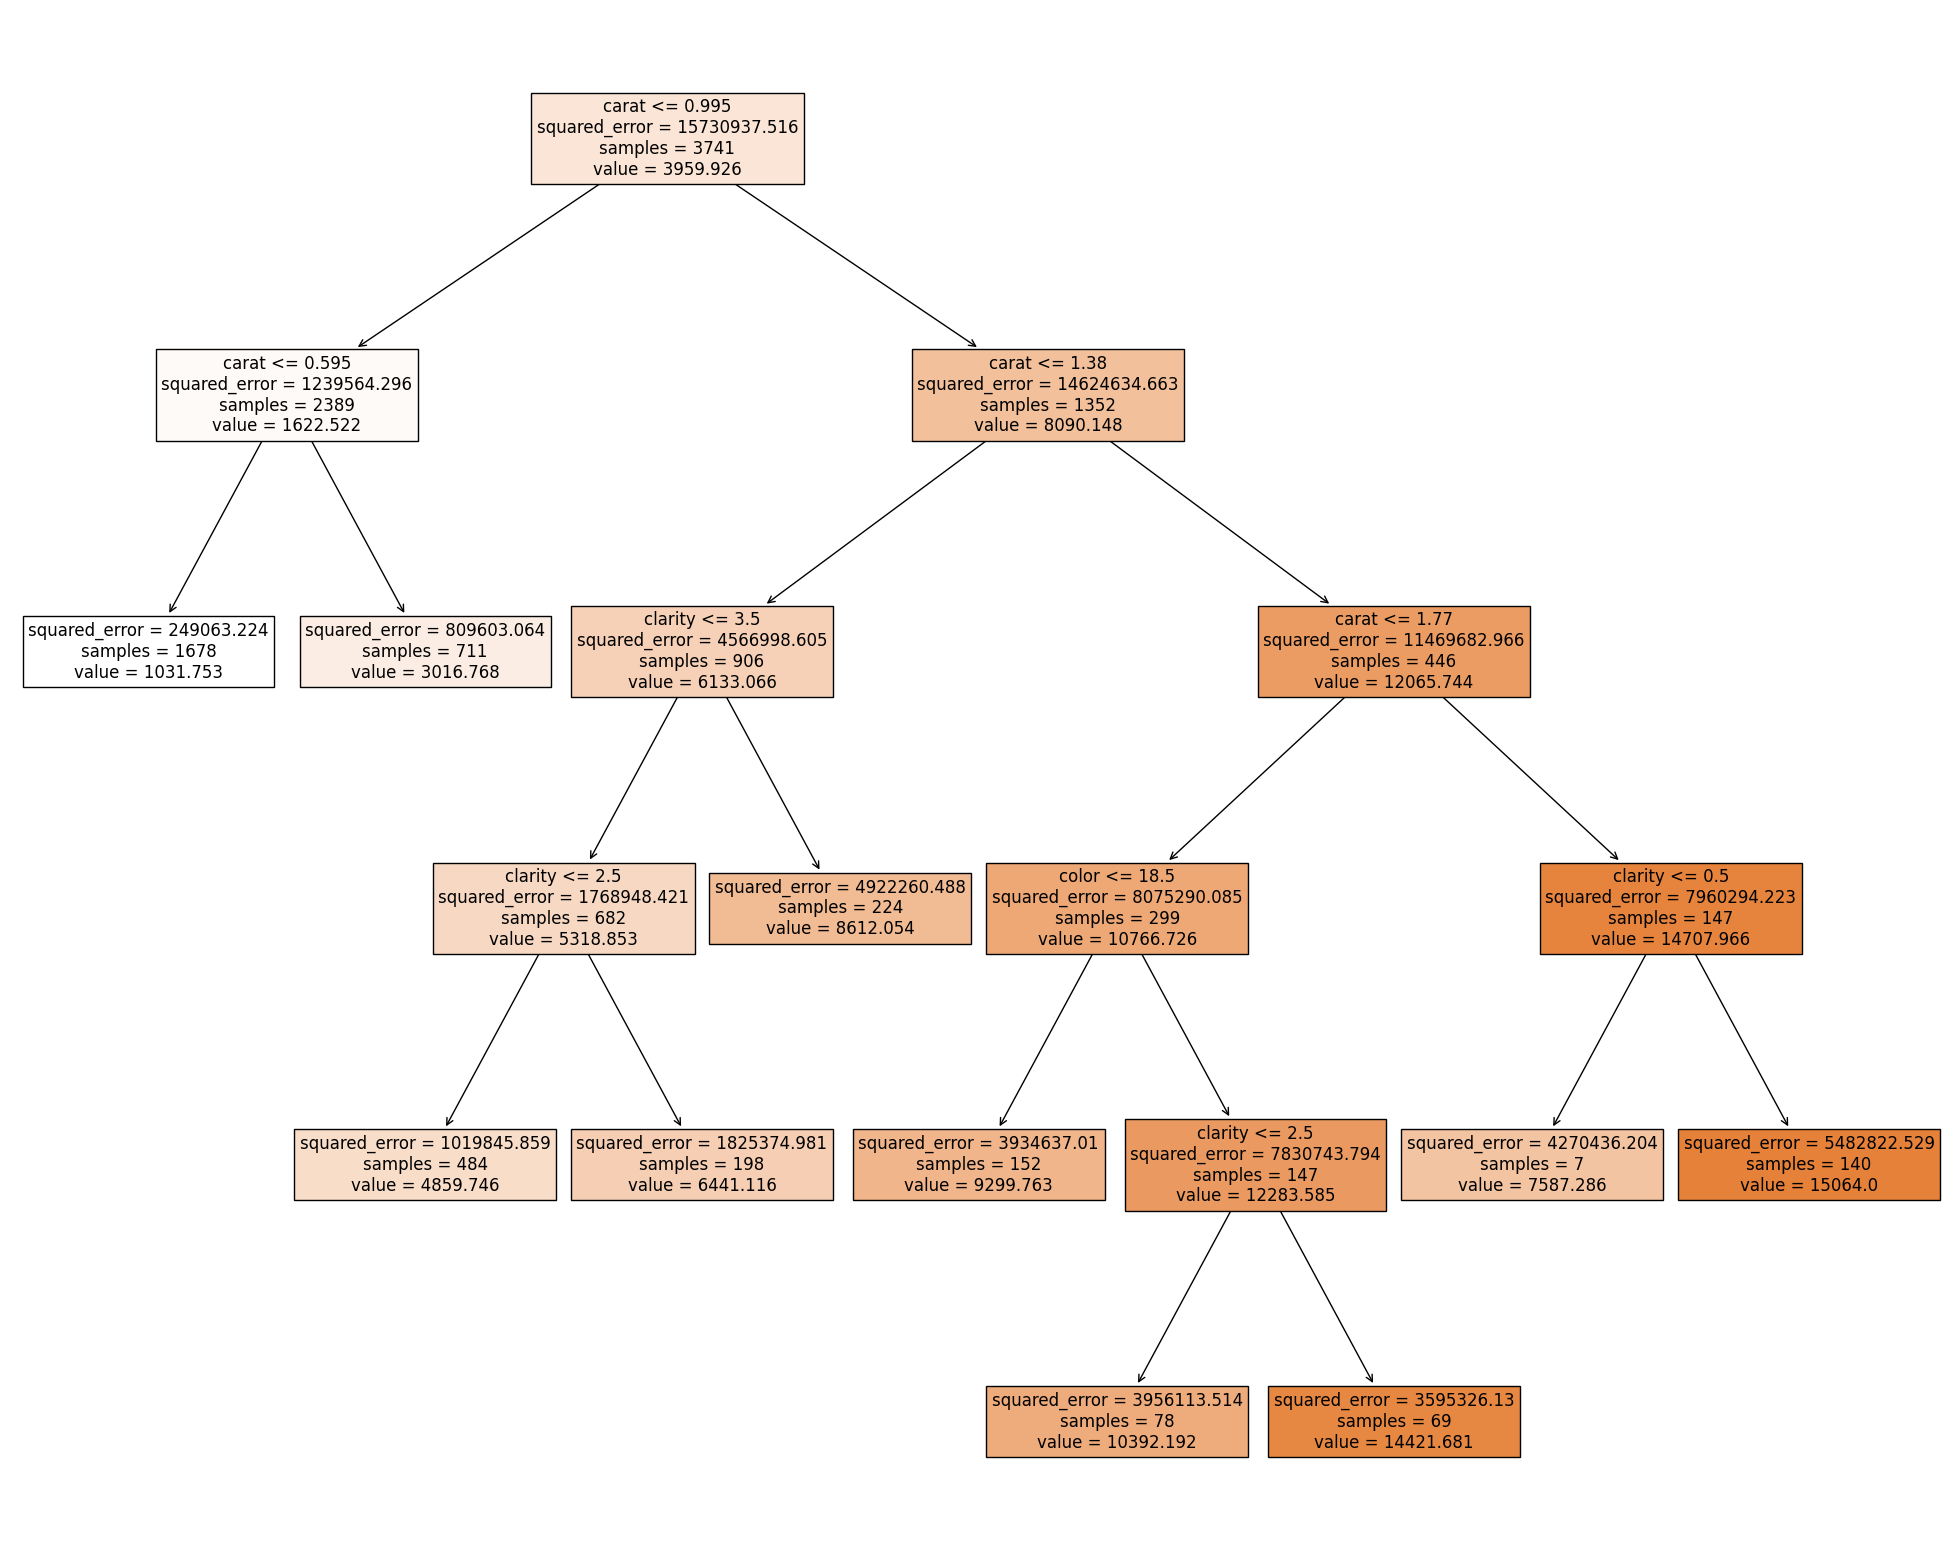

In [113]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   filled=True,
                   fontsize=12)

## What we can learn from this tree?

* Most of the Regression is based on the ```carat```, we can expect this because there is a big correlation
* Also the ```clarity``` is considered in some cases
* And in a very very few cases the ```color```

* The ```cut``` seems to be not so significant, same for ```table``` and ```width```

## Follow-up: How we can expand this model?

### Random Forest

To make the model robust we can use [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), which is a technique of creating n-trees and averaging the results.

It is interesting because can run in parallel.

### XGBoost

Another algorithm based on the idea of the Decision Trees in the [XGBoost](https://xgboost.readthedocs.io/en/stable/).

It has really good performances, and produce a tree that can be printed.